In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import sys
import warnings
warnings.filterwarnings('ignore')

import matplotlib.ticker as ticker
ax=plt.axes()

%matplotlib inline 

df = pd.read_csv('taxi_collision.csv')
nyc = pd.read_csv('NYC_taxi.csv')

In [2]:
df_cut = df.dropna(subset= ['timestamp'], how = 'any')
df.drop(['zip_code'], axis = 1, inplace = True)

In [3]:
df.shape

(665, 3)

In [4]:
df['day'] = df.timestamp.str.split('T').str[0].str[-2:]
df['hour'] = df.timestamp.str.split('T').str[1].str[0:2]

df.head()

,timestamp,longitude,latitude,day,hour
0,2015-01-01T01:20:00,-74.002786,40.749591,01,01
1,2015-01-01T01:30:00,-73.947901,40.792933,01,01
2,2015-01-01T01:51:00,-73.919000,40.758975,01,01
3,2015-01-01T02:00:00,-73.992614,40.702060,01,02
4,2015-01-01T02:20:00,-73.953647,40.771024,01,02


In [5]:
nyc.head()

,zip_code,pickup_hour,month,day,weekday,hour,is_weekend,cnt
0,11106,2015-01-01 00:00:00,1,1,3,0,0,75
1,10006,2015-01-01 00:00:00,1,1,3,0,0,64
2,11201,2015-01-01 00:00:00,1,1,3,0,0,169
3,11430,2015-01-01 00:00:00,1,1,3,0,0,222
4,10032,2015-01-01 00:00:00,1,1,3,0,0,64


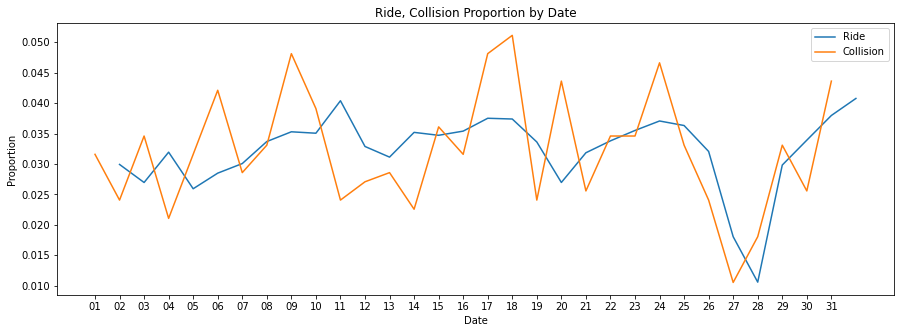

In [6]:
date = nyc.groupby(['day']).sum()['cnt']
date_collision = df.groupby(['day']).count()['timestamp']

date_ratio = date / sum(date)
date_collision_ratio = date_collision / sum(date_collision)

plt.figure(figsize=(15,5))

plt.plot(date_ratio, label='Ride')
plt.plot(date_collision_ratio, label='Collision')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.xlabel('Date')
plt.ylabel('Proportion')
plt.title('Ride, Collision Proportion by Date')
plt.legend()
plt.show()

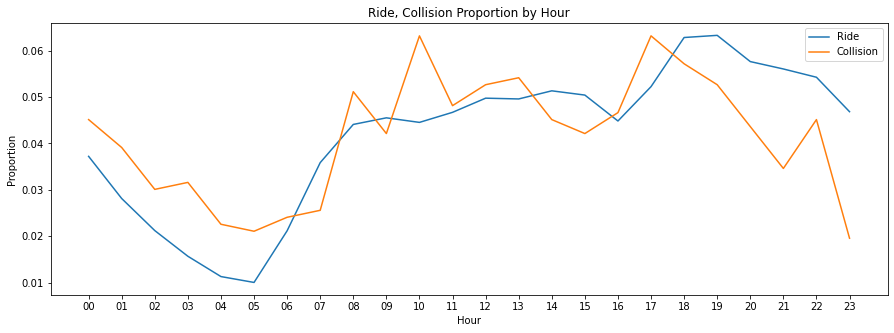

In [7]:
hour = nyc.groupby(['hour']).sum()['cnt']
hour_collision = df.groupby(['hour']).count()['timestamp']

hour_ratio = hour / sum(hour)
hour_collision_ratio = hour_collision / sum(hour_collision)

plt.figure(figsize=(15,5))

plt.plot(hour_ratio, label = 'Ride')
plt.plot(hour_collision_ratio, label = 'Collision')
plt.xlabel('Hour')
plt.ylabel('Proportion')
plt.title('Ride, Collision Proportion by Hour')
plt.legend()
plt.show()

In [8]:
df['day'] = pd.to_numeric(df['day'])

df_weekday = pd.merge(df, nyc[['day', 'weekday']], on = "day", how = "left")

df_weekday.head()

,timestamp,longitude,latitude,day,hour,weekday
0,2015-01-01T01:20:00,-74.002786,40.749591,1,01,3
1,2015-01-01T01:20:00,-74.002786,40.749591,1,01,3
2,2015-01-01T01:20:00,-74.002786,40.749591,1,01,3
3,2015-01-01T01:20:00,-74.002786,40.749591,1,01,3
4,2015-01-01T01:20:00,-74.002786,40.749591,1,01,3


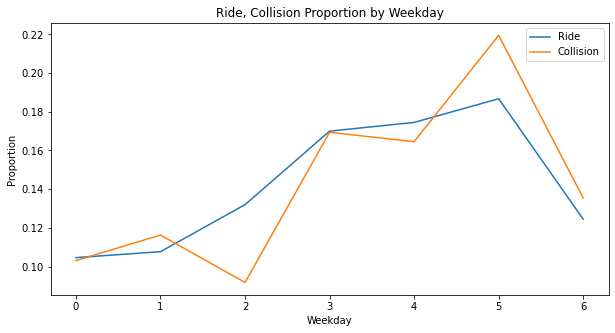

In [9]:
weekday = nyc.groupby(['weekday']).sum()['cnt']
weekday_collision = df_weekday.groupby(['weekday']).count()['timestamp']

weekday_ratio = weekday / sum(weekday)
weekday_collision_ratio = weekday_collision / sum(weekday_collision)

plt.figure(figsize=(10,5))

plt.plot(weekday_ratio, label = 'Ride')
plt.plot(weekday_collision_ratio, label = 'Collision')
plt.xlabel('Weekday')
plt.ylabel('Proportion')
plt.title('Ride, Collision Proportion by Weekday')
plt.legend()
plt.show()